# Analise de dados da Dengue utilizando os mapas do GeoPandas

In [34]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

rjPath = "../RJdata/Mapas/RJ/33MUE250GC_SIR.shp"

rj = gpd.read_file(rjPath)

rj.head()

# rj.plot()

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1468,3300100,ANGRA DOS REIS,"MULTIPOLYGON (((-44.33208 -23.02384, -44.33221..."
1,1469,3300159,APERIBÉ,"POLYGON ((-42.08950 -21.62893, -42.08912 -21.6..."
2,1470,3300209,ARARUAMA,"POLYGON ((-42.22526 -22.59253, -42.22521 -22.5..."
3,1471,3300225,AREAL,"POLYGON ((-43.16007 -22.20005, -43.16003 -22.1..."
4,1472,3300233,ARMAÇÃO DOS BÚZIOS,"MULTIPOLYGON (((-41.98427 -22.74458, -41.98296..."


In [7]:
dataDf = pd.read_csv("../RJdata/mainRJData.csv")

# Uppercase because the geopandas data uses uppercase name for cities.
dataDf["Municipios"] = dataDf["Municipios"].str.upper()

dataDf.head()


,Unnamed: 0,Municipios,Latitude,Longitude,Limitrofes,Populacao,2010,2011,2012,2013,2014,2015
0,0,ANGRA DOS REIS,-23.006397,-44.316326,"Mangaratiba,Paraty,Rio Claro",210171,888,4351,1271,7758,56,8012
1,1,APERIBÉ,-21.621193,-42.102817,"Cambuci,Itaocara,Santo Antônio de Pádua",12036,16,27,105,212,4,21
2,2,ARARUAMA,-22.873320,-42.342890,"Arraial do Cabo,Cabo Frio,Iguaba Grande,São Pe...",136109,629,667,155,1857,22,391
3,3,AREAL,-22.231492,-43.105626,"Paraíba do Sul,Petrópolis,São José do Vale do ...",12763,2,37,2,60,0,363
4,4,ARMAÇÃO DOS BÚZIOS,-22.759781,-41.887527,Cabo Frio,35060,33,601,76,1367,8,47


### Juntar os dados dos municipios com os dados de dengue

In [9]:
merged = rj.set_index("NM_MUNICIP").join(dataDf.set_index("Municipios"))

merged.head()

,ID,CD_GEOCODM,geometry,Unnamed: 0,Latitude,Longitude,Limitrofes,Populacao,2010,2011,2012,2013,2014,2015
NM_MUNICIP,,,,,,,,,,,,,,
ANGRA DOS REIS,1468,3300100,"MULTIPOLYGON (((-44.33208 -23.02384, -44.33221...",0,-23.006397,-44.316326,"Mangaratiba,Paraty,Rio Claro",210171,888,4351,1271,7758,56,8012
APERIBÉ,1469,3300159,"POLYGON ((-42.08950 -21.62893, -42.08912 -21.6...",1,-21.621193,-42.102817,"Cambuci,Itaocara,Santo Antônio de Pádua",12036,16,27,105,212,4,21
ARARUAMA,1470,3300209,"POLYGON ((-42.22526 -22.59253, -42.22521 -22.5...",2,-22.873320,-42.342890,"Arraial do Cabo,Cabo Frio,Iguaba Grande,São Pe...",136109,629,667,155,1857,22,391
AREAL,1471,3300225,"POLYGON ((-43.16007 -22.20005, -43.16003 -22.1...",3,-22.231492,-43.105626,"Paraíba do Sul,Petrópolis,São José do Vale do ...",12763,2,37,2,60,0,363
ARMAÇÃO DOS BÚZIOS,1472,3300233,"MULTIPOLYGON (((-41.98427 -22.74458, -41.98296...",4,-22.759781,-41.887527,Cabo Frio,35060,33,601,76,1367,8,47


### Plotar o mapa em relacao a algum ano

<AxesSubplot:>

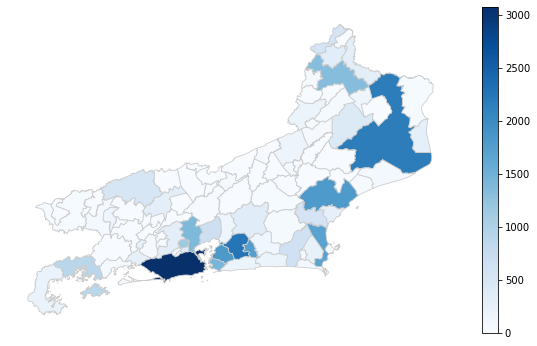

In [19]:
yearToPlot = "2010"

vmin = merged[yearToPlot].min()
vmax = merged[yearToPlot].max()

fig, ax = plt.subplots(1, figsize=(10,6))

#create map
ax.axis('off')
sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []

cbar = fig.colorbar(sm)

merged.plot(column=yearToPlot, cmap="Blues", linewidth=0.8, ax=ax, edgecolor="0.8")


# Create a gif for visualizing the data

The gif should show us the cases increasing as the weeks pass by

In [28]:
weeklyDengueDataPath = "../RJdata/Dengue_Brasil_2010-2016_Daniel.xlsx"

names = ['id', 'cities']
for i in range(1, 53):
    names.append(str(i))
names.append('total')


weeklyDengueData = pd.read_excel(weeklyDengueDataPath, names=names, header=None, sheet_name=None)

weeklyDengueData["2010"].head()

,id,cities,1,2,3,4,5,6,7,8,...,44,45,46,47,48,49,50,51,52,total
0,330010,Angra dos Reis,6,4,0,2,3,3,7,12,...,9,6,1,4,4,0,9,9,0,888
1,330015,Aperibé,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
2,330020,Araruama,0,0,0,3,4,2,4,8,...,12,1,0,0,0,0,2,1,0,629
3,330022,Areal,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,330023,Armação dos Búzios,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,33


In [33]:
yearToUse = "2010"

#Merge with GeoPandas data
weeklyDengueData[yearToUse]["cities"] = weeklyDengueData[yearToUse]["cities"].str.upper()
# weeklyDengueData[yearToUse].head()

gifMerged = rj.set_index("NM_MUNICIP").join(weeklyDengueData[yearToUse].set_index("cities"))

gifMerged.head()

,ID,CD_GEOCODM,geometry,id,1,2,3,4,5,6,...,44,45,46,47,48,49,50,51,52,total
NM_MUNICIP,,,,,,,,,,,,,,,,,,,,,
ANGRA DOS REIS,1468,3300100,"MULTIPOLYGON (((-44.33208 -23.02384, -44.33221...",330010.0,6.0,4.0,0.0,2.0,3.0,3.0,...,9.0,6.0,1.0,4.0,4.0,0.0,9.0,9.0,0.0,888.0
APERIBÉ,1469,3300159,"POLYGON ((-42.08950 -21.62893, -42.08912 -21.6...",330015.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
ARARUAMA,1470,3300209,"POLYGON ((-42.22526 -22.59253, -42.22521 -22.5...",330020.0,0.0,0.0,0.0,3.0,4.0,2.0,...,12.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,629.0
AREAL,1471,3300225,"POLYGON ((-43.16007 -22.20005, -43.16003 -22.1...",330022.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
ARMAÇÃO DOS BÚZIOS,1472,3300233,"MULTIPOLYGON (((-41.98427 -22.74458, -41.98296...",330023.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0


In [ ]:
weeks = np.linspace(1,52,52, dtype=int)

outputPath = "./weeksplot/" + yearToUse


gifMerged["Cumulative"] = pd.Series(np.zeros(92), index=gifMerged.index)

# gifMerged.head()

for week in weeks:


    gifMerged["Cumulative"] = gifMerged[str(week)] + gifMerged["Cumulative"]
    vmin = gifMerged["Cumulative"].min()
    vmax = gifMerged["Cumulative"].max()


    fig = gifMerged.plot(column="Cumulative", cmap="Blues", figsize=(15,6), linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax, legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))

    fig.axis('off')

    fig.set_title(f"Casos de dengue {yearToUse}. Semana {week}", \
                fontdict = dict(fontsize=25, fontweight=3))

    filepath = os.path.join(outputPath, str(week) + "_dengue.jpg")
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)

In [64]:
#Create the gif

for i in range(52):
    print('./viz/img{:03d}.png'.format(i))

./viz/img000.png
./viz/img001.png
./viz/img002.png
./viz/img003.png
./viz/img004.png
./viz/img005.png
./viz/img006.png
./viz/img007.png
./viz/img008.png
./viz/img009.png
./viz/img010.png
./viz/img011.png
./viz/img012.png
./viz/img013.png
./viz/img014.png
./viz/img015.png
./viz/img016.png
./viz/img017.png
./viz/img018.png
./viz/img019.png
./viz/img020.png
./viz/img021.png
./viz/img022.png
./viz/img023.png
./viz/img024.png
./viz/img025.png
./viz/img026.png
./viz/img027.png
./viz/img028.png
./viz/img029.png
./viz/img030.png
./viz/img031.png
./viz/img032.png
./viz/img033.png
./viz/img034.png
./viz/img035.png
./viz/img036.png
./viz/img037.png
./viz/img038.png
./viz/img039.png
./viz/img040.png
./viz/img041.png
./viz/img042.png
./viz/img043.png
./viz/img044.png
./viz/img045.png
./viz/img046.png
./viz/img047.png
./viz/img048.png
./viz/img049.png
./viz/img050.png
./viz/img051.png
